# 0. Install and Import Dependencies

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import imutils
import cv2

# 1. Read in Image, Grayscale and Blur

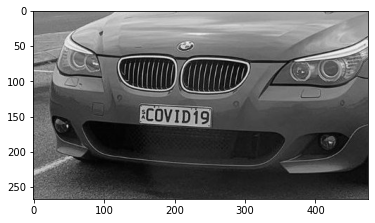

In [41]:
img = cv2.imread('./image2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB));

# 2. Apply filter and find edges for localization

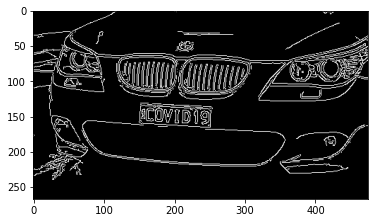

In [42]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB));

# 3. Find contours and Apply Mask

In [43]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [44]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if (len(approx) == 4):
        location = approx
        break

In [45]:
location

array([[[152, 136]],

       [[248, 139]],

       [[251, 164]],

       [[153, 160]]], dtype=int32)

In [46]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

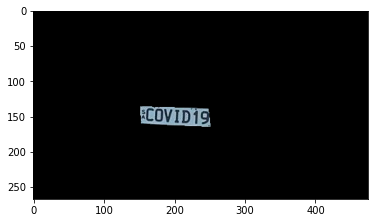

In [47]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB));

In [48]:
(x, y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

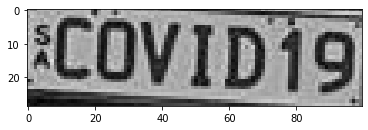

In [49]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB));

# 4. Use Easy OCR to Read Text

In [50]:
!pip install easyocr

In [51]:
import easyocr

In [52]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[0, 0], [100, 0], [100, 29], [0, 29]], ':COVID19', 0.47240203619003296)]

# 5. Render Result

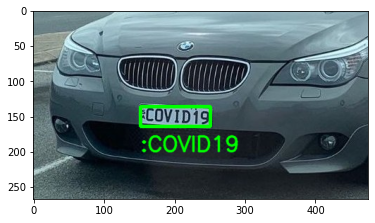

In [53]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0, 255, 0), 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))